In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from plotly.offline import iplot
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, MinMaxScaler

In [2]:
infile = open('rating_movies_clean','rb')
df_sample = pickle.load(infile)
infile.close()

In [3]:
df_droped = df_sample.drop(['movieId', 'title','genres_splited', 'genres', 'timestamp', 'userId'], axis=1)
df_droped.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
15347762,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
16647840,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.5
23915192,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.0
10052313,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.0
12214125,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,4.0


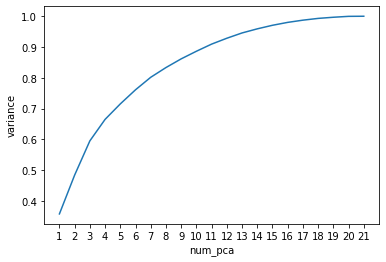

In [4]:
x = df_droped.values

pca = PCA()
pca.fit_transform(x)
var = pca.explained_variance_ratio_.cumsum()
num_pca= range(1,len(var)+1)
elbow_plot = pd.DataFrame({'num_pca':num_pca , 'variance': var})
sns.lineplot(x='num_pca', y='variance', data = elbow_plot)
plt.xticks(num_pca)
plt.show()


In [6]:
x = df_droped.values
pca = PCA(n_components= 7)
pca.fit_transform(x)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7'])
principalDf

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,0.578225,0.744604,0.461401,-0.454664,-0.139681,0.321402,0.019063
1,-0.903736,-0.743256,0.627504,0.463699,-0.480282,-0.288950,0.403518
2,-0.427739,0.868706,-0.141581,0.423313,-0.134765,-0.075413,0.234109
3,1.584851,1.043625,0.467985,-0.627631,-0.390120,-0.062064,-0.274151
4,-0.543946,-0.185214,-0.912881,0.105860,0.023213,-0.548831,0.952132
...,...,...,...,...,...,...,...
499995,-0.530176,0.024640,-0.825827,0.020893,0.242679,-0.207693,0.086724
499996,-0.532587,-0.647943,-0.479099,-0.441491,-0.332684,-0.250949,0.465497
499997,-0.980010,-0.760918,0.005154,0.044849,-0.189430,0.174963,-0.379074
499998,-0.544239,-0.393932,-0.551905,-0.482197,-0.031771,0.008097,-0.319985


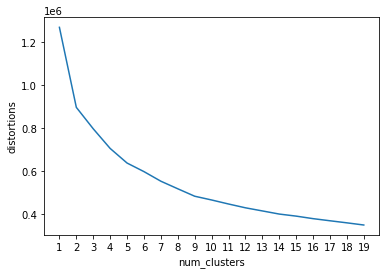

In [8]:
distortions = []
num_clusters =  range(1,20)


for n in num_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(principalDf)
    distortions.append(kmeans.inertia_)
    
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(principalDf)
cluster_pred = kmeans.predict(principalDf)
cluster_pred

array([2, 0, 2, ..., 4, 3, 4])

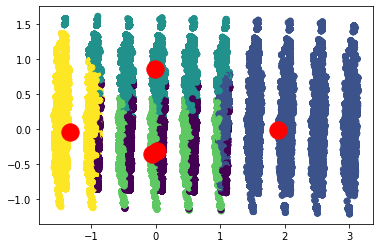

In [17]:
plt.scatter(principalDf['PCA1'], principalDf['PCA2'], c=cluster_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')